## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.1,0.2]
num_neo=[[512,256,128],[512,256]]

In [7]:
results = {}
for drp in Dropout_EXP:
    for num in num_neo:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num, drp_ratio=drp)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-dropout-%s-layers-%s" % (str(drp),str(len(num)+2))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)

50000/50000 [==============================] - 3s 63us/step - loss: 1.1988 - acc: 0.5700 - val_loss: 1.3508 - val_acc: 0.5194
Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.2054 - acc: 0.5668 - val_loss: 1.3352 - val_acc: 0.5300
Epoch 45/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1833 - acc: 0.5746 - val_loss: 1.3320 - val_acc: 0.5299
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.1868 - acc: 0.5719 - val_loss: 1.3636 - val_acc: 0.5209
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.1770 - acc: 0.5801 - val_loss: 1.3400 - val_acc: 0.5350
Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.1717 - acc: 0.5801 - val_loss: 1.3428 - val_acc: 0.5267
Epoch 49/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.1791 - acc: 0.5747 - val_loss: 1.3423 - val_acc: 0.5268
Epoch 50/50
50000/50000 [=====================

Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1972 - acc: 0.5705 - val_loss: 1.3335 - val_acc: 0.5269
Epoch 45/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1884 - acc: 0.5747 - val_loss: 1.3361 - val_acc: 0.5295
Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1815 - acc: 0.5768 - val_loss: 1.3437 - val_acc: 0.5243
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1914 - acc: 0.5739 - val_loss: 1.3302 - val_acc: 0.5313
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1712 - acc: 0.5807 - val_loss: 1.3288 - val_acc: 0.5308
Epoch 49/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1693 - acc: 0.5798 - val_loss: 1.3422 - val_acc: 0.5274
Epoch 50/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.1682 - acc: 0.5814 - val_loss: 1.3413 - val_acc: 0.5291
__________________________________

Epoch 43/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4155 - acc: 0.4892 - val_loss: 1.3950 - val_acc: 0.5035
Epoch 44/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4054 - acc: 0.4960 - val_loss: 1.4118 - val_acc: 0.4993
Epoch 45/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4118 - acc: 0.4924 - val_loss: 1.3893 - val_acc: 0.5053
Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4087 - acc: 0.4920 - val_loss: 1.4026 - val_acc: 0.4948
Epoch 47/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4070 - acc: 0.4939 - val_loss: 1.4049 - val_acc: 0.5003
Epoch 48/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3949 - acc: 0.4984 - val_loss: 1.3983 - val_acc: 0.5058
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3959 - acc: 0.4977 - val_loss: 1.3998 - val_acc: 0.4963
Epoch 50/50
50000/50000 [=========

Epoch 44/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3726 - acc: 0.5073 - val_loss: 1.4102 - val_acc: 0.4934
Epoch 45/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3768 - acc: 0.5061 - val_loss: 1.3938 - val_acc: 0.5067
Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3851 - acc: 0.5059 - val_loss: 1.3937 - val_acc: 0.5047
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.3715 - acc: 0.5083 - val_loss: 1.3729 - val_acc: 0.5109
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3683 - acc: 0.5066 - val_loss: 1.3863 - val_acc: 0.5078
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3648 - acc: 0.5093 - val_loss: 1.3885 - val_acc: 0.5062
Epoch 50/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.3610 - acc: 0.5121 - val_loss: 1.3813 - val_acc: 0.5085


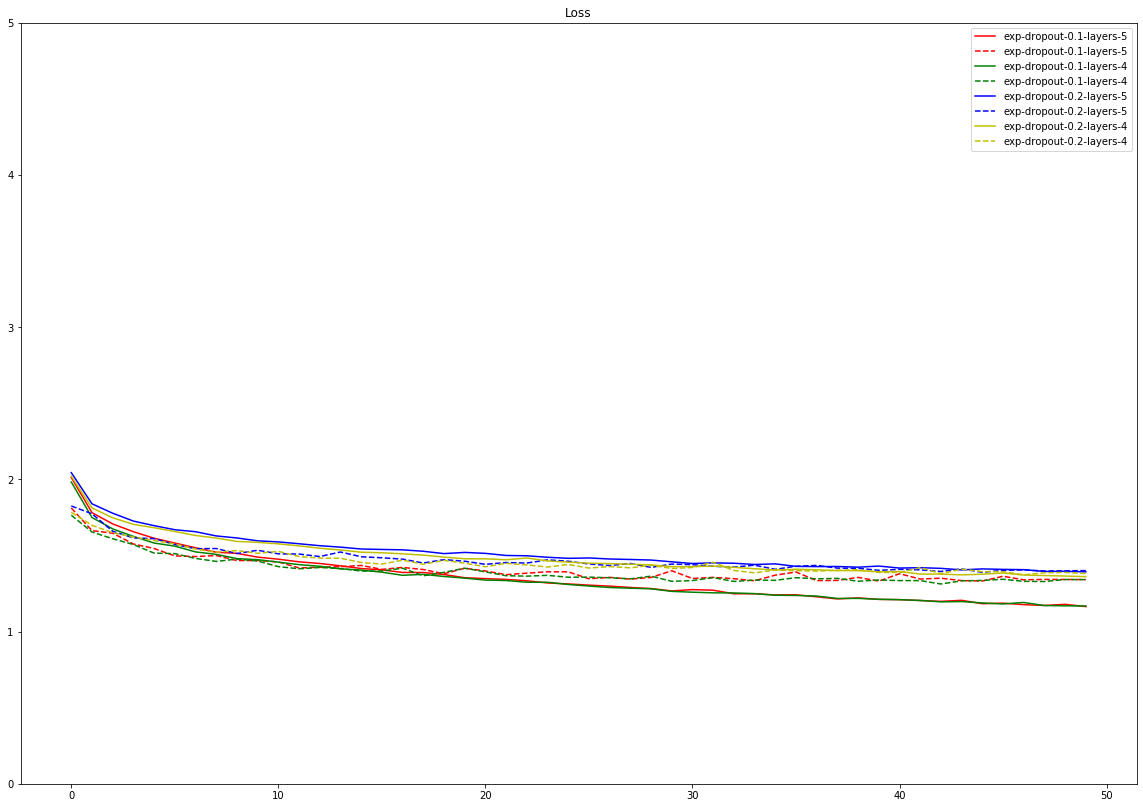

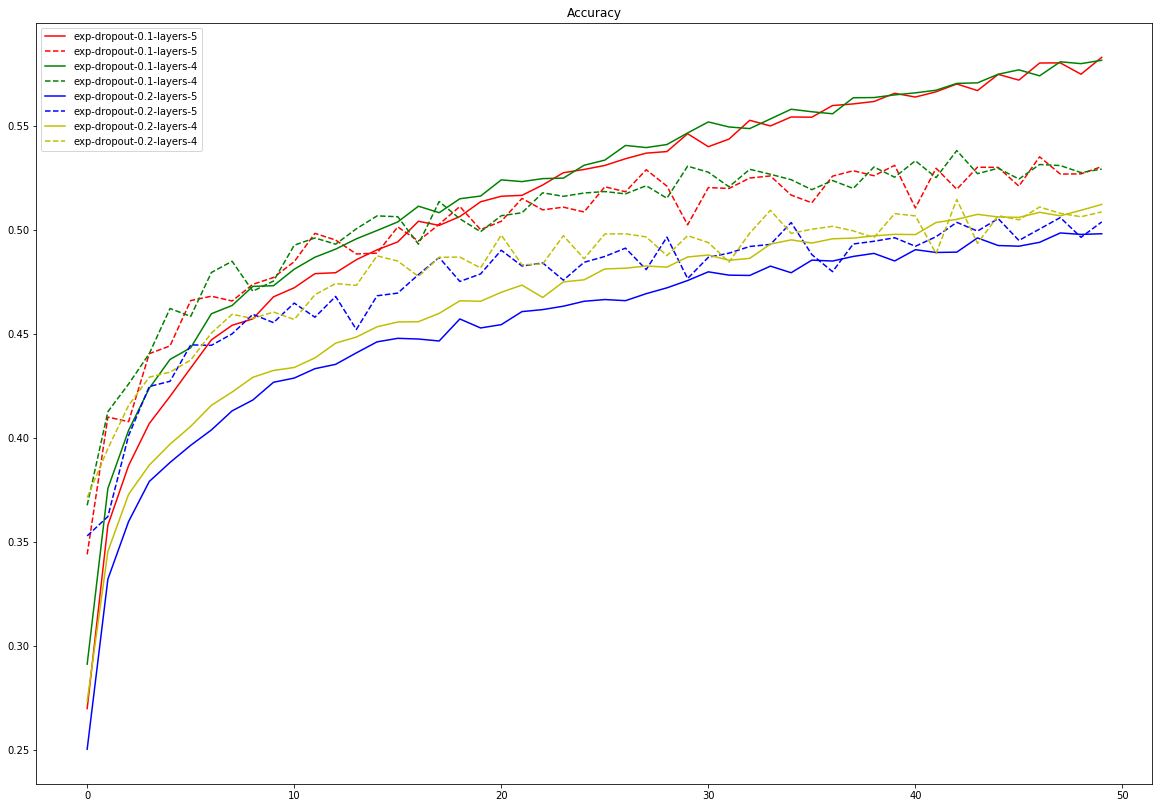

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()